In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
df=pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Gradious\Assignments\DL\Batch Normalization, Optimizers, Autoencoders\healthcare_dataset.csv')
df.head()

,PatientID,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,PhysicalActivity,Outcome
0,1,69.0,Other,23.6,NaN,Normal,1,Former,High,0
1,2,32.0,Male,18.9,NaN,High,1,Former,Low,0
2,3,NaN,Other,29.4,120.6,High,0,Current,High,1
3,4,78.0,Male,21.9,91.3,High,0,Former,Low,1
4,5,38.0,Female,22.1,137.7,High,0,NaN,Low,0


In [4]:
df.describe()

,PatientID,Age,BMI,BloodPressure,Diabetes,Outcome
count,3000.000000,2700.000000,2700.000000,2700.000000,3000.000000,3000.000000
mean,1500.500000,52.694815,26.561556,129.953037,0.501667,0.496667
std,866.169729,20.555751,4.885207,28.786392,0.500081,0.500072
min,1.000000,18.000000,18.000000,80.000000,0.000000,0.000000
25%,750.750000,35.000000,22.400000,105.900000,0.000000,0.000000
50%,1500.500000,52.000000,26.600000,129.800000,1.000000,0.000000
75%,2250.250000,70.000000,30.700000,154.700000,1.000000,1.000000
max,3000.000000,89.000000,35.000000,180.000000,1.000000,1.000000


In [5]:
df.drop(columns=['PatientID'], inplace=True)

In [6]:
df.isnull().sum()  

Age                 300
Gender                0
BMI                 300
BloodPressure       300
Cholesterol         300
Diabetes              0
SmokingStatus       300
PhysicalActivity      0
Outcome               0
dtype: int64

In [7]:
print(df.duplicated().sum())

0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2700 non-null   float64
 1   Gender            3000 non-null   object 
 2   BMI               2700 non-null   float64
 3   BloodPressure     2700 non-null   float64
 4   Cholesterol       2700 non-null   object 
 5   Diabetes          3000 non-null   int64  
 6   SmokingStatus     2700 non-null   object 
 7   PhysicalActivity  3000 non-null   object 
 8   Outcome           3000 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 211.1+ KB


In [9]:
df=df.astype({'Diabetes': 'object', 'Outcome': 'object'})

In [10]:
# Fill missing numeric values with the mean
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# Fill missing categorical values with the mode
df_categorical = df.select_dtypes(include=['object'])
for col in df_categorical.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13028\224946084.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
df_numeric

,Age,BMI,BloodPressure
0,69.0,23.6,NaN
1,32.0,18.9,NaN
2,NaN,29.4,120.6
3,78.0,21.9,91.3
4,38.0,22.1,137.7
...,...,...,...
2995,44.0,29.5,80.6
2996,51.0,19.6,91.0
2997,61.0,30.4,137.3
2998,85.0,23.9,82.4


In [12]:
df

,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,PhysicalActivity,Outcome
0,69.000000,Other,23.6,129.953037,Normal,1,Former,High,0
1,32.000000,Male,18.9,129.953037,High,1,Former,Low,0
2,52.694815,Other,29.4,120.600000,High,0,Current,High,1
3,78.000000,Male,21.9,91.300000,High,0,Former,Low,1
4,38.000000,Female,22.1,137.700000,High,0,Never,Low,0
...,...,...,...,...,...,...,...,...,...
2995,44.000000,Female,29.5,80.600000,Normal,1,Current,Low,1
2996,51.000000,Female,19.6,91.000000,Normal,1,Never,Moderate,1
2997,61.000000,Other,30.4,137.300000,High,0,Former,Low,0
2998,85.000000,Female,23.9,82.400000,High,0,Former,Low,1


In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
X

array([[69.0, 'Other', 23.6, ..., 1, 'Former', 'High'],
       [32.0, 'Male', 18.9, ..., 1, 'Former', 'Low'],
       [52.69481481481481, 'Other', 29.4, ..., 0, 'Current', 'High'],
       ...,
       [61.0, 'Other', 30.4, ..., 0, 'Former', 'Low'],
       [85.0, 'Female', 23.9, ..., 0, 'Former', 'Low'],
       [32.0, 'Male', 29.6, ..., 1, 'Former', 'Low']],
      shape=(3000, 8), dtype=object)

In [15]:
y

array([0, 0, 1, ..., 0, 1, 0], shape=(3000,), dtype=object)

In [16]:
# encode categorical columns in df
X_encoded = pd.get_dummies(df.drop(columns=['Outcome']), columns=df_categorical.columns[:-1], drop_first=True)

In [17]:
X_scaler = StandardScaler()
# y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X_encoded)
# y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
print(type(y_train))
print(y_train.dtype)
print(np.unique(y_train))


<class 'numpy.ndarray'>
object
[0 1]


### Convert to tensors

In [20]:


import torch
# Convert y_train and y_test to float32 explicitly
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Now convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train).unsqueeze(1)
y_test_tensor = torch.tensor(y_test).unsqueeze(1)


In [21]:
import random
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True  # deterministic behaviour
    torch.backends.cudnn.benchmark = False

set_seed(42)

## Autoencoder for dimensionality reduction

In [22]:

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
train_loader = DataLoader(X_train_tensor, batch_size=32,shuffle=True)

## Train Autoencoder

In [23]:
for epoch in range(10):
    for batch in train_loader:
        reconstructed = autoencoder(batch)
        loss = criterion(reconstructed, batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

## Extract encoded features

In [24]:

with torch.no_grad():
    X_train_reduced = autoencoder.encoder(X_train_tensor)
    X_test_reduced = autoencoder.encoder(X_test_tensor)


## Classifier with Batch Normalization

In [25]:
class Classifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

### Training function with different optimizers and batch modes

In [26]:
from sklearn.metrics import accuracy_score

def train_classifier(optimizer_type='adam', batch_type='full'):
    model = Classifier(X_train_reduced.shape[1])
    criterion = nn.BCELoss()

    # Set batch size depending on mode
    if mode == 'mini':
        batch_size = 32
    elif mode == 'full':
        batch_size = len(X_train_tensor)
    elif mode == 'stochastic':
        batch_size = 2  

    # Dataloader with drop_last to avoid batch size 1
    train_dataset = TensorDataset(X_train_reduced, y_train_tensor)
    loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


    for epoch in range(10):
        for xb, yb in loader:
            preds = model(xb)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_pred = model(X_test_reduced)
        y_pred_cls = (y_pred > 0.5).float()
        acc = accuracy_score(y_test_tensor.numpy(), y_pred_cls.numpy())
    return acc

# Evaluate all combinations
results = {}
for opt in ['adam', 'adagrad']:
    for mode in ['full', 'mini', 'stochastic']:
        acc = train_classifier(opt, mode)
        results[f"{opt}_{mode}"] = acc

print("Accuracy Results:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Accuracy Results:
adam_full: 0.5033
adam_mini: 0.5300
adam_stochastic: 0.5200
adagrad_full: 0.4950
adagrad_mini: 0.5117
adagrad_stochastic: 0.5100


### Plotting

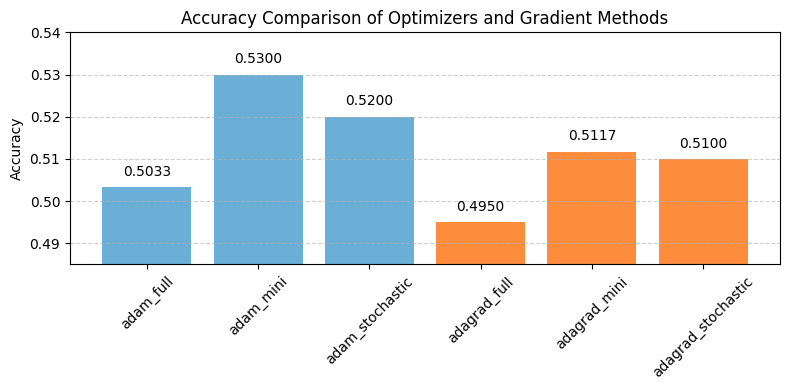

In [27]:
labels = list(results.keys())
accuracies = list(results.values())
colors = ['#6baed6' if 'adam' in lbl else '#fd8d3c' for lbl in labels]

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, accuracies, color=colors)
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Optimizers and Gradient Methods')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.4f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Results & Findings

##### This study investigated the impact of dimensionality reduction using autoencoders and the influence of different gradient descent strategies combined with optimizers on a healthcare prediction task.

##### An autoencoder was used to compress high-dimensional input features, helping improve training efficiency and reduce overfitting. A neural network classifier with batch normalization was trained on the compressed features using various optimization strategies.

## Observed Accuracy

Adam (Full-batch): 0.5033

#### Adam (Mini-batch): 0.5300 ← Best Accuracy

Adam (Stochastic): 0.5200

Adagrad (Full-batch): 0.4950

Adagrad (Mini-batch): 0.5117

Adagrad (Stochastic): 0.5100

### Conclusion

##### Among all configurations, the Adam optimizer with mini-batch gradient descent achieved the best performance, indicating a good balance between stability and frequent parameter updates. While Adagrad performed reasonably well, Adam’s adaptive learning rate mechanism led to better generalization and higher accuracy in this run.

##### This confirms that the combination of autoencoders, batch normalization, and adaptive optimizers like Adam can significantly enhance model performance for healthcare datasets.